In [1]:
import prepare
import modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime

# Acquire

In [2]:
# pull data from csv
df = pd.read_csv('globaltemp.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
# look at datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [4]:
# check size of dataframe
df.shape

(8599212, 7)

# Prepare

In [5]:
# change all columns to all lowercase
df.columns = df.columns.str.lower()

In [6]:
df = df.rename(columns = {'averagetemperature':'avg_temp', 'averagetemperatureuncertainty':'avt_temp_error'})
df.head()

,dt,avg_temp,avt_temp_error,city,country,latitude,longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [7]:
# converting date object to a datetime64
prepare.covert_date(df, 'dt', '%Y-%m-%d')

,dt,avg_temp,avt_temp_error,city,country,latitude,longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [8]:
# making dt the index
df = prepare.date_index(df, 'dt')
df.head()

,avg_temp,avt_temp_error,city,country,latitude,longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-11-01,5.044,2.222,Pleven,Bulgaria,44.20N,24.60E
1743-11-01,4.635,1.711,Plock,Poland,52.24N,18.39E
1743-11-01,2.872,2.228,Ploiesti,Romania,45.81N,26.54E
1743-11-01,4.528,2.201,Plovdiv,Bulgaria,42.59N,24.00E


In [9]:
# converting temperature from celsius to farenheit
df.avg_temp = df.avg_temp * 1.8 + 32
df.avg_temp

dt
1743-11-01    42.9224
1743-11-01    41.0792
1743-11-01    40.3430
1743-11-01    37.1696
1743-11-01    40.1504
               ...   
2013-09-01        NaN
2013-09-01        NaN
2013-09-01        NaN
2013-09-01    71.2670
2013-09-01        NaN
Name: avg_temp, Length: 8599212, dtype: float64

In [10]:
# adding a month and year column
prepare.month_year_add(df)

,avg_temp,avt_temp_error,city,country,latitude,longitude,month,year
dt,,,,,,,,
1743-11-01,42.9224,1.737,Århus,Denmark,57.05N,10.33E,November,1743
1743-11-01,41.0792,2.222,Pleven,Bulgaria,44.20N,24.60E,November,1743
1743-11-01,40.3430,1.711,Plock,Poland,52.24N,18.39E,November,1743
1743-11-01,37.1696,2.228,Ploiesti,Romania,45.81N,26.54E,November,1743
1743-11-01,40.1504,2.201,Plovdiv,Bulgaria,42.59N,24.00E,November,1743
...,...,...,...,...,...,...,...,...
2013-09-01,NaN,NaN,Tabriz,Iran,37.78N,46.78E,September,2013
2013-09-01,NaN,NaN,Guangyuan,China,32.95N,106.28E,September,2013
2013-09-01,NaN,NaN,Guangshui,China,31.35N,113.09E,September,2013


In [11]:
# removing unnecessary columns
df = df.drop(columns= ['avt_temp_error', 'latitude', 'longitude'])

In [12]:
# filtering dataframe to only cities with Cambridge
cam = df[df.city == 'Cambridge']
cam.head()

,avg_temp,city,country,month,year
dt,,,,,
1743-11-01,45.5738,Cambridge,United Kingdom,November,1743
1743-11-01,34.1384,Cambridge,United States,November,1743
1743-12-01,NaN,Cambridge,United Kingdom,December,1743
1743-12-01,NaN,Cambridge,United States,December,1743
1744-01-01,NaN,Cambridge,United Kingdom,January,1744


In [13]:
# filtering dataframe further to countries with only United Kingdom
cam = cam[cam.country == 'United Kingdom']
cam.shape

(3239, 5)

In [14]:
# checking for nulls
cam.isnull().sum()

avg_temp    73
city         0
country      0
month        0
year         0
dtype: int64

In [15]:
# filtering dataframe to a time window with no nulls
# technically still has one null
cam = cam[cam.year >= 1753]

In [16]:
# filling the one remaining null with the mean value
cam = cam.fillna(cam.avg_temp.mean())

In [17]:
# no more nulls
cam.isnull().any()

avg_temp    False
city        False
country     False
month       False
year        False
dtype: bool

<AxesSubplot:xlabel='dt'>

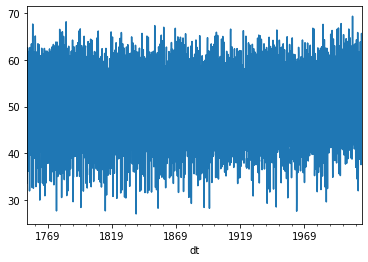

In [18]:
# plotting the avg temp over time
cam.avg_temp.plot()

In [19]:
# removing 2013 data due to it being an incomplete year
cam = cam[(cam['year'] != 2013)]

# Split Data

In [20]:
# splitting data using percentages
# setting split parameters
train_size = int(len(cam) * 0.5)
val_size = int(len(cam) * 0.3)
test_size = int(len(cam) - train_size - val_size)
len(cam) == train_size + val_size + test_size

True

In [21]:
# finalizing the split with actual variables
train = cam[:train_size]
validate_end_index = train_size + val_size
validate = cam[train_size:validate_end_index]
test = cam[validate_end_index:]

In [22]:
# checking that the data split properly
train.shape[0], validate.shape[0], test.shape[0]

(1560, 936, 624)

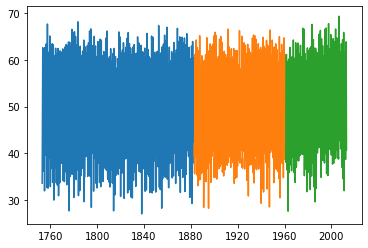

In [23]:
# plotting the data split for visualization purposes
plt.plot(train.index, train.avg_temp)
plt.plot(validate.index, validate.avg_temp)
plt.plot(test.index, test.avg_temp)

# Explore

In [24]:
# establishing my target variable
y = train.avg_temp
y.head()

dt
1753-01-01    33.5750
1753-02-01    38.7374
1753-03-01    44.9600
1753-04-01    46.4522
1753-05-01    53.2562
Name: avg_temp, dtype: float64

<AxesSubplot:ylabel='Frequency'>

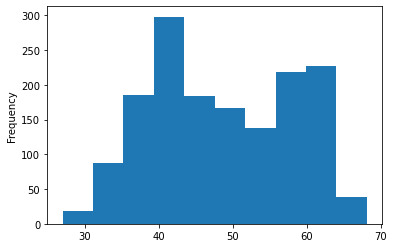

In [25]:
# plotting my target variable frequency
y.plot.hist()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

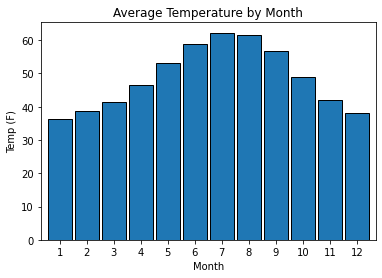

In [26]:
# plotting the avg temperature by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

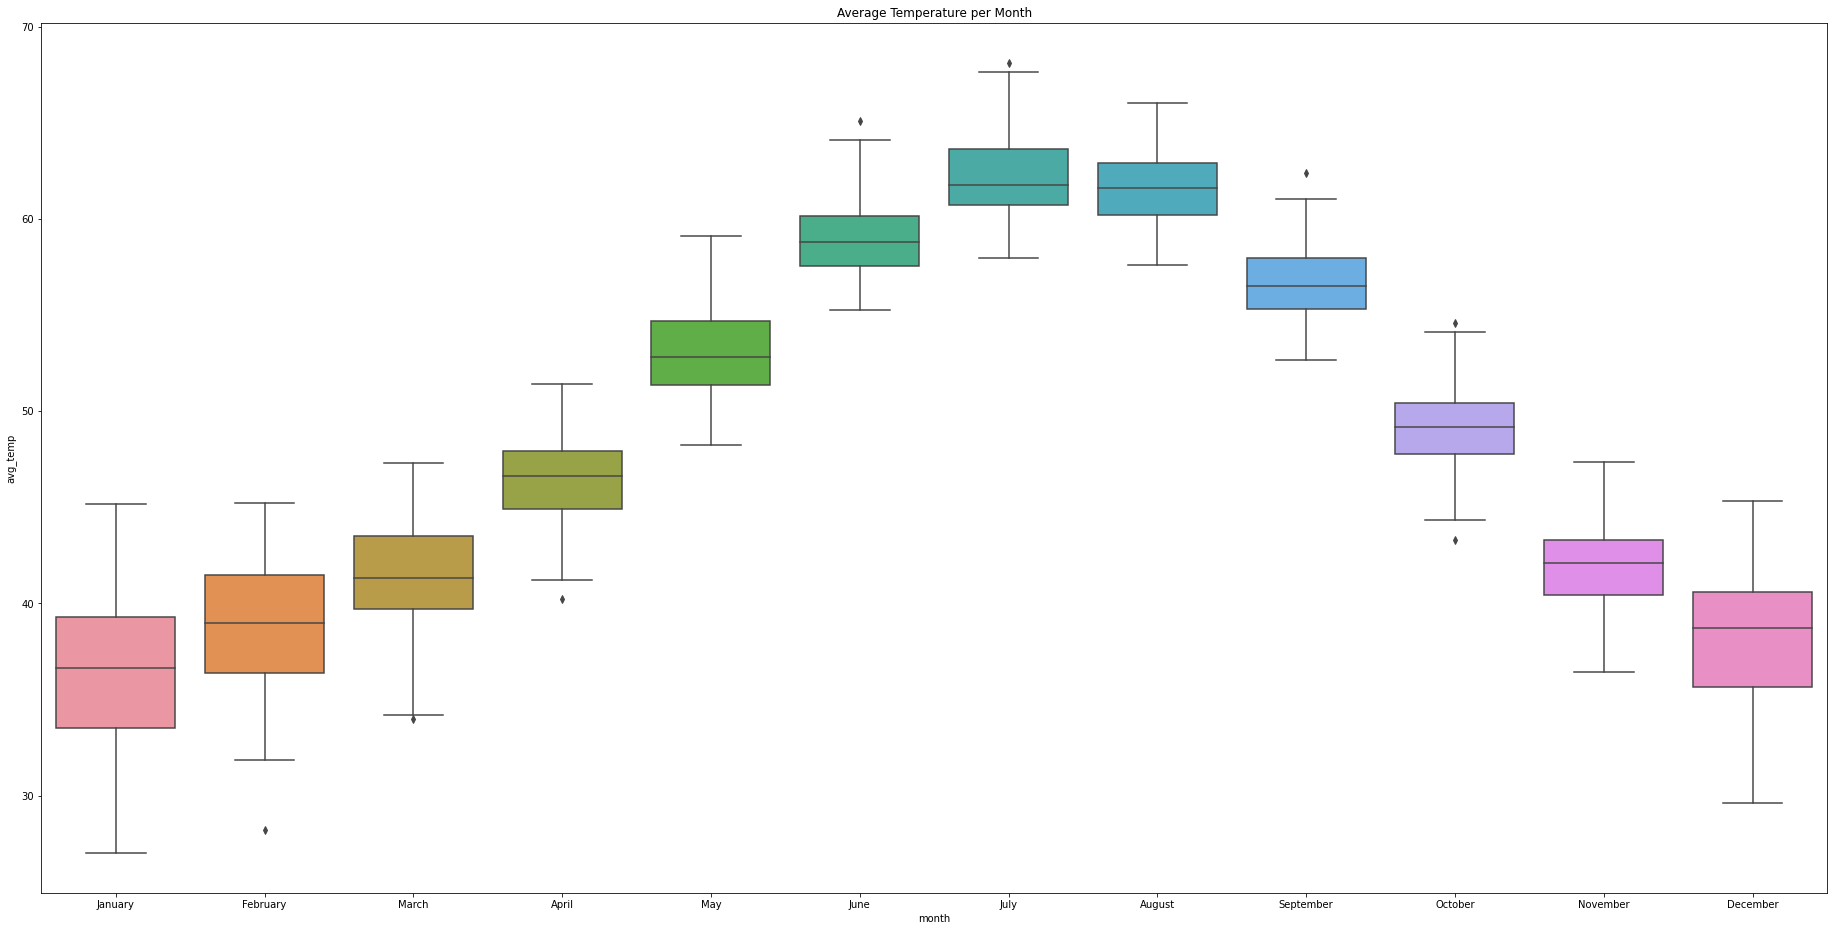

In [27]:
# plotting my target variable using boxplots for a different visualization
plt.figure(figsize=(32,16))

sns.boxplot(data=train, y='avg_temp', x='month')
plt.title('Average Temperature per Month')
plt.show()

# Modeling

In [28]:
# capturing the last avg temp recorded
temp = train['avg_temp'][-1:][0]
temp

37.8662

In [29]:
#  creating a dataframe for the last avg temp recorded to be used in forecasting using the last observed value
yhat_df = pd.DataFrame({'avg_temp': [temp]}, index=validate.index)
yhat_df.head()

,avg_temp
dt,
1883-01-01,37.8662
1883-02-01,37.8662
1883-03-01,37.8662
1883-04-01,37.8662
1883-05-01,37.8662


avg_temp -- RMSE: 14


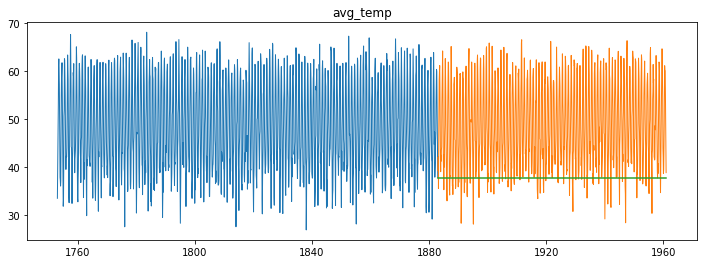

In [30]:
# plotting the last observed value
modeling.plot_and_eval(train, validate, yhat_df, 'avg_temp')

In [31]:
# creating a dataframe to hold all model RMSEs
eval_df = modeling.make_eval_df()

In [32]:
# adding last observed value model to the records
eval_df = modeling.append_eval_df('last_observed', validate, yhat_df, eval_df, 'avg_temp')

In [33]:
# showing dataframe for evals
eval_df

,model_type,target_var,rmse
0,last_observed,avg_temp,14.0


In [34]:
# creating a dataframe for simple average model 
temp = round(train['avg_temp'].mean(),2)

yhat_df = pd.DataFrame({'avg_temp': [temp]}, index=validate.index)
yhat_df.head()

,avg_temp
dt,
1883-01-01,48.68
1883-02-01,48.68
1883-03-01,48.68
1883-04-01,48.68
1883-05-01,48.68


avg_temp -- RMSE: 9


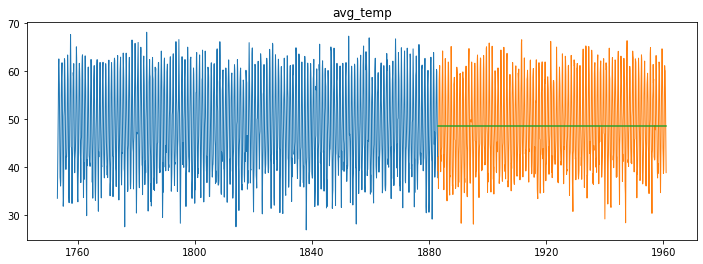

In [35]:
# plotting simple average model
modeling.plot_and_eval(train, validate, yhat_df, 'avg_temp')

In [36]:
# adding simple average model to the records
eval_df = modeling.append_eval_df('simple_avg', validate, yhat_df, eval_df, 'avg_temp')
eval_df

,model_type,target_var,rmse
0,last_observed,avg_temp,14.0
1,simple_avg,avg_temp,9.0


In [37]:
# creating a dataframe for moving average model using 365 days/1 year as the period
temp = round(train['avg_temp'].rolling(365).mean().iloc[-1],2)

yhat_df = pd.DataFrame({'avg_temp': [temp]}, index=validate.index)
yhat_df.head()

,avg_temp
dt,
1883-01-01,48.74
1883-02-01,48.74
1883-03-01,48.74
1883-04-01,48.74
1883-05-01,48.74


avg_temp -- RMSE: 9


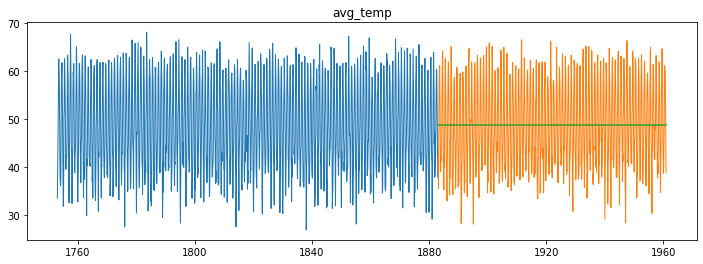

In [38]:
# plotting the moving average model
modeling.plot_and_eval(train, validate, yhat_df, 'avg_temp')

In [39]:
# adding the moving average model to the records
eval_df = modeling.append_eval_df('1Y_moving_avg', validate, yhat_df, eval_df, 'avg_temp')
eval_df

,model_type,target_var,rmse
0,last_observed,avg_temp,14.0
1,simple_avg,avg_temp,9.0
2,1Y_moving_avg,avg_temp,9.0


avg_temp 



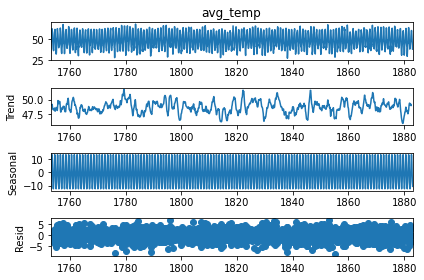

In [40]:
# importing statsmodels for tsa model creation
import statsmodels.api as sm

# plotting tsa
print('avg_temp','\n')
_ = sm.tsa.seasonal_decompose(train['avg_temp'].resample('M').mean()).plot()
plt.show()


In [41]:
# importing Holts Linear Trend method
from statsmodels.tsa.api import Holt

# creating the Holts model
model = Holt(train.avg_temp, exponential = False, damped_trend=True)
# fitting the model
model = model.fit(optimized = True)
# predicting the values  and creating a dataframe to be used for RMSE validation
yhat_temp = model.predict(start = validate.index[0],
                              end = validate.index[-1])
yhat_df = round(yhat_temp, 2)

yhat_df = pd.DataFrame({'avg_temp': yhat_df}, index=validate.index)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
# checking my work
yhat_df

,avg_temp
dt,
1883-01-01,33.84
1883-02-01,30.69
1883-03-01,28.17
1883-04-01,26.16
1883-05-01,24.55
...,...
1960-08-01,18.11
1960-09-01,18.11
1960-10-01,18.11


avg_temp -- RMSE: 32


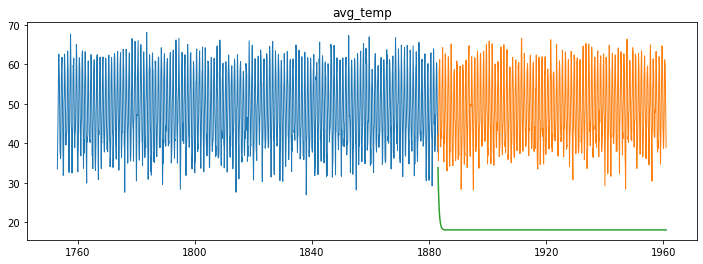

In [43]:
# plotting the holts method although the chart doesn't look right
modeling.plot_and_eval(train, validate, yhat_df, 'avg_temp')

In [44]:
# adding the holt metrics to my evaluation chart 
eval_df = modeling.append_eval_df('Holt', validate, yhat_df, eval_df, 'avg_temp')
eval_df

,model_type,target_var,rmse
0,last_observed,avg_temp,14.0
1,simple_avg,avg_temp,9.0
2,1Y_moving_avg,avg_temp,9.0
3,Holt,avg_temp,32.0


In [45]:
# Re-splitting my train, validate, and test sets for the previous cycle method
train = cam.loc[:'2010']
validate = cam.loc['2011']
test = cam.loc['2012']

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()

(3096, 5)
(12, 5)
(12, 5)


,avg_temp,city,country,month,year
dt,,,,,
2010-08-01,61.2356,Cambridge,United Kingdom,August,2010
2010-09-01,57.5384,Cambridge,United Kingdom,September,2010
2010-10-01,50.8388,Cambridge,United Kingdom,October,2010
2010-11-01,41.8352,Cambridge,United Kingdom,November,2010
2010-12-01,31.9568,Cambridge,United Kingdom,December,2010


In [46]:
# ensuring that the train ends where the validate set starts
pd.concat([train.tail(1), validate.head(1)])

,avg_temp,city,country,month,year
dt,,,,,
2010-12-01,31.9568,Cambridge,United Kingdom,December,2010
2011-01-01,39.3800,Cambridge,United Kingdom,January,2011


In [47]:
# creating a year over year avg difference off of 2010 data
yhat_df = train['2010'].avg_temp + train.avg_temp.diff(12).mean()

In [48]:
pd.concat([yhat_df.head(1), validate.avg_temp.head(1)])

dt
2010-01-01    34.485479
2011-01-01    39.380000
Name: avg_temp, dtype: float64

In [49]:
# set yhat_df to index of validate
yhat_df.index = validate.index
len(yhat_df)

12

In [50]:
# turning the series into a dataframe
yhat_df = pd.DataFrame({'avg_temp': yhat_df}, index=validate.index)
yhat_df

,avg_temp
dt,
2011-01-01,34.485479
2011-02-01,37.061279
2011-03-01,43.559279
2011-04-01,48.725279
2011-05-01,52.390079
2011-06-01,61.033679
2011-07-01,65.848679
2011-08-01,61.235279
2011-09-01,57.538079


avg_temp -- RMSE: 5


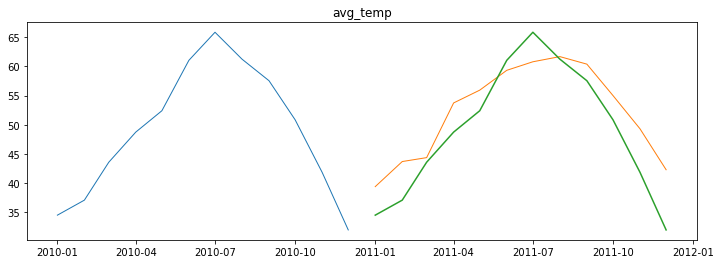

In [51]:
# plotting the predictions of my previous cycle model
modeling.plot_and_eval(train['2010'], validate, yhat_df, 'avg_temp')

In [52]:
# adding the PC model metrics to my evaluation chart
eval_df = modeling.append_eval_df('previous_cycle', validate, yhat_df, eval_df, 'avg_temp')
eval_df

,model_type,target_var,rmse
0,last_observed,avg_temp,14.0
1,simple_avg,avg_temp,9.0
2,1Y_moving_avg,avg_temp,9.0
3,Holt,avg_temp,32.0
4,previous_cycle,avg_temp,5.0


In [53]:
# evaluating which model has the least amount of error thus the best chance of predicting future temperatures
min_rmse_avg_temp = eval_df.groupby('target_var')['rmse'].min()[0]

eval_df[(eval_df.rmse == min_rmse_avg_temp)]

,model_type,target_var,rmse
4,previous_cycle,avg_temp,5.0


# The best model for predicting future temperature in Cambridge, U.K is the previous cycle model with the least amount of error in predicting temperature